In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [8]:
gold_data = pd.read_csv('gld_price_data.csv')

In [9]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Number of duplicate rows:  (0, 6)


<AxesSubplot:>

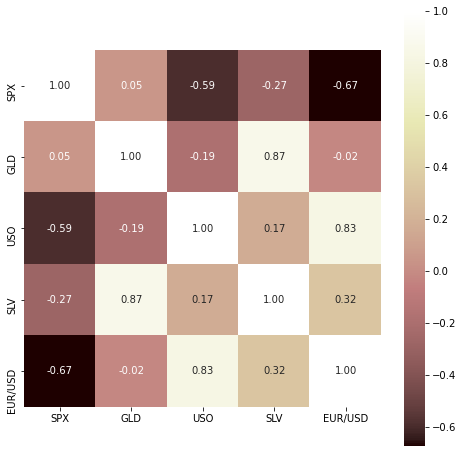

In [13]:
duplicate_rows = gold_data[gold_data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)
plt.subplots(figsize=(8,8))
sns.heatmap(gold_data.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='pink')

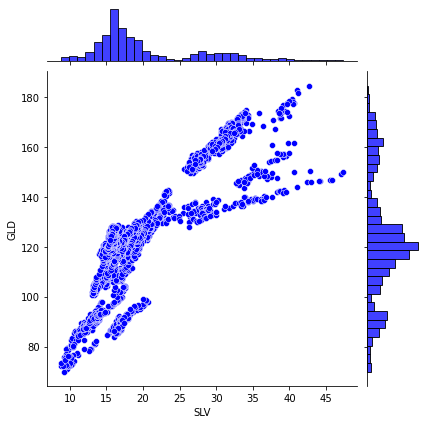

In [15]:

sns.jointplot(x =gold_data['SLV'], y = gold_data['GLD'], color = 'blue')

C:\Users\Suraj Tiwari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

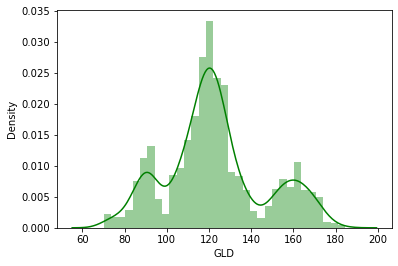

In [17]:
sns.distplot(gold_data['GLD'], color = 'green')

In [37]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


In [39]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
test_data_prediction = regressor.predict(x_test)

In [42]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989305978744485


In [43]:
y_test = list(y_test)

In [44]:
def fit_predict(model1):
    model = model1
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print('RSS: ', metrics.r2_score(y_test, y_predict))
    print('MAE :', metrics.mean_absolute_error(y_test, y_predict))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price of Gold')
    plt.show()
    plt.scatter(y_test, y_predict, c='crimson')
    p1 = max(max(y_predict), max(y_train))
    p2 = min(min(y_predict), min(y_train))
    plt.plot([p1,p2], [p1,p2], 'b-')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.show()

RSS:  0.8975640982991402
MAE : 5.6959006442692885


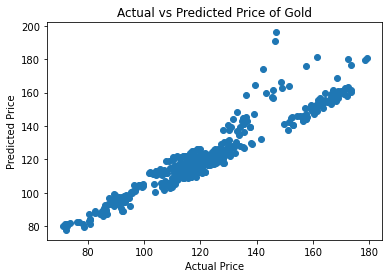

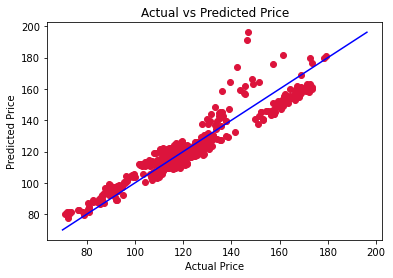

In [45]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

Text(0, 0.5, 'GLD Price')

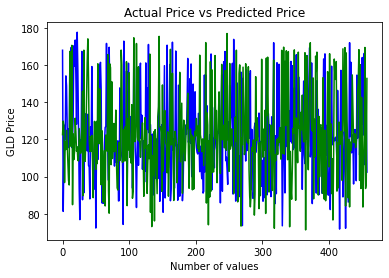

In [46]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)
test_case_list = [1254.25, 70.2527, 18.280001, 0.9232]
test_case_df = pd.DataFrame(test_case_list)
test_case = test_case_df.T
test_case_prediction = model.predict(test_case)
print('Price of Gold would be:', test_case_prediction) 

Price of Gold would be: [108.70919959]
